# S12 T01: Pipelines, grid search y text mining
### - Descripción
Empecemos a familiarizarnos con Pipelines, grid search y text mining !!! Empecemos con varios ejercicios básicos
___

In [1]:
#import basic libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
import string
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud, ImageColorGenerator
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import nltk
nltk.download('punkt')

In [2]:
#import te dataset 
database_flights = pd.read_csv('DelayedFlights.csv')

## Data information:
- *Year:* 2008 year of flight (stored as integer).
- *Month:* 1-12 month of the flight(stored as integer).
- *DayOfMonth*: day of the month (1 to 31) (stored as integer).
- *DayOfWeek*: day of the week (stored as factor). 1 (Monday) - 7 (Sunday) 
- *DepTime*: actual departure time (local, hhmm)
- *CRSDepTime*: scheduled departure time (local, hhmm)
- *ArrTime*: actual arrival time (local, hhmm)
- *CRSArrTime*: scheduled arrival time (local, hhmm)
- *UniqueCarrier*: unique carrier code
- *FlightNum*: flight number
- *TailNum*: plane tail number: aircraft registration, unique aircraft identifier
- *ActualElapsedTime*: in minutes
- *CRSElapsedTime*: in minutes
- *AirTime*: in minutes
- *ArrDelay*: arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- *DepDelay*: departure delay, in minutes
- *Origin*: origin IATA airport code
- *Dest*: destination IATA airport code
- *Distance*: in miles
- *TaxiIn*: taxi in time, in minutes
- *TaxiOut*: taxi out time in minutes
- *Cancelled*: was the flight cancelled
- *CancellationCode*: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- *Diverted* 1 = yes, 0 = no
- *CarrierDelay in minutes*: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- *WeatherDelay in minutes*: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- *NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
- *SecurityDelay in minutes*: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- *LateAircraftDelay in minutes*: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

*https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

## Data preprocessing:

In [3]:
print(database_flights.shape)
database_flights.describe().transpose()

(1936758, 30)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0,3.341651e+06,2.066065e+06,0.0,1517452.5,3242558.0,4972466.75,7009727.0
Year,1936758.0,2.008000e+03,0.000000e+00,2008.0,2008.0,2008.0,2008.00,2008.0
Month,1936758.0,6.111106e+00,3.482546e+00,1.0,3.0,6.0,9.00,12.0
DayofMonth,1936758.0,1.575347e+01,8.776272e+00,1.0,8.0,16.0,23.00,31.0
DayOfWeek,1936758.0,3.984827e+00,1.995966e+00,1.0,2.0,4.0,6.00,7.0
DepTime,1936758.0,1.518534e+03,4.504853e+02,1.0,1203.0,1545.0,1900.00,2400.0
CRSDepTime,1936758.0,1.467473e+03,4.247668e+02,0.0,1135.0,1510.0,1815.00,2359.0
ArrTime,1929648.0,1.610141e+03,5.481781e+02,1.0,1316.0,1715.0,2030.00,2400.0
CRSArrTime,1936758.0,1.634225e+03,4.646347e+02,0.0,1325.0,1705.0,2014.00,2400.0
FlightNum,1936758.0,2.184263e+03,1.944702e+03,1.0,610.0,1543.0,3422.00,9742.0


In [4]:
database_flights = database_flights.drop(['Unnamed: 0','TailNum'],axis=1)

In [5]:
database_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             float64
 19  TaxiOut            float64
 20  Cancelled          int64  
 21  CancellationCode   object 
 22  Diverted           int64  
 23  CarrierDelay       float64
 24  WeatherDelay       float64
 25  NASDelay          

### Procesamiento y Limpieza de datos 


In [6]:
#data type object to categoric variables
database_flights[['UniqueCarrier','Origin','Dest']] = database_flights[['UniqueCarrier','Origin','Dest']].astype('category')

In [7]:
database_flights.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Como los datos faltantes se refieren a entradas de informacion que no se encuentran, eliminamos las observaciones con datos faltantes.

In [8]:
database_flights.dropna(inplace=True)

In [9]:
#data float to int
database_flights[["ActualElapsedTime","CRSElapsedTime","AirTime",'ArrDelay','DepDelay','CRSDepTime','DepTime','CRSArrTime','ArrTime']] = database_flights[["ActualElapsedTime","CRSElapsedTime","AirTime",'ArrDelay','DepDelay','CRSDepTime','DepTime','CRSArrTime','ArrTime']].astype('int64')

### Data sample

Al tener casi dos millones de datos, se hace un muestreo aleatorio simple para poder optimizar los tiempos de calculo del notebook.
<br>

El sampling por calculo nos dice que una muestra valida puede ser de 400 datos, pero para abarcar un expectro mayor de datos, se ha decidido usar una muestra de mil datos

In [10]:
#Simple Random Sampling
data_sample = database_flights.sample(1000, random_state=1)
data_sample

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1057817,2008,6,9,1,1016,1010,1323,1255,AS,651,...,3.0,25.0,0,N,0,6.0,0.0,22.0,0.0,0.0
116991,2008,1,25,5,1653,1500,1731,1548,MQ,3249,...,2.0,15.0,0,N,0,103.0,0.0,0.0,0.0,0.0
122272,2008,1,20,7,1100,1015,1208,1125,MQ,3985,...,3.0,14.0,0,N,0,0.0,9.0,0.0,0.0,34.0
431879,2008,3,14,5,1920,1730,2033,1838,OH,5604,...,2.0,12.0,0,N,0,110.0,0.0,5.0,0.0,0.0
113258,2008,1,17,4,1712,1529,1859,1711,FL,62,...,17.0,18.0,0,N,0,0.0,0.0,108.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739059,2008,5,13,2,2317,2100,37,2210,WN,3207,...,4.0,12.0,0,N,0,0.0,0.0,10.0,0.0,137.0
1222301,2008,7,2,3,1703,1625,1953,1855,AA,257,...,6.0,54.0,0,N,0,0.0,0.0,20.0,0.0,38.0
213013,2008,2,24,7,1855,1830,2119,2100,WN,1598,...,5.0,12.0,0,N,0,0.0,0.0,0.0,0.0,19.0
61676,2008,1,22,2,1003,950,1138,1109,OO,5561,...,4.0,18.0,0,N,0,0.0,0.0,0.0,0.0,29.0


### Feature engineering

Primero normalizamos las variables categoricas:

In [11]:
encoder = TargetEncoder()
data_sample[['Origin','Dest','UniqueCarrier','CancellationCode']]=encoder.fit_transform(data_sample[['Origin','Dest','UniqueCarrier','CancellationCode']],data_sample['ArrDelay'])


C:\Users\Usuario\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Segundo, escalamos los datos

In [12]:
#copy of dataset
data_scale=data_sample.drop(columns=['ArrDelay'])

#scaler
scaler= StandardScaler()

#scale data
scaler.fit(data_scale)

#transform the data
data_fs = scaler.transform(data_scale)
data_fs = pd.DataFrame(data_fs, columns=data_scale.columns)


In [13]:
data_fs

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,-0.052724,-0.794358,-1.516466,-1.238523,-1.182092,-0.555101,-0.898944,1.902284,-0.795145,...,-0.817799,0.248118,0.0,-1.0,0.0,-0.303146,-0.196992,0.330072,-0.055347,-0.658186
1,0.0,-1.470036,1.015887,0.519059,0.208368,0.017333,0.166427,-0.252338,-0.834019,0.520506,...,-1.012698,-0.330650,0.0,-1.0,0.0,1.852342,-0.196992,-0.479831,-0.055347,-0.658186
2,0.0,-1.470036,0.450185,1.536821,-1.047725,-1.169853,-0.758472,-1.185834,-0.834019,0.893224,...,-0.817799,-0.388527,0.0,-1.0,0.0,-0.436475,0.281661,-0.479831,-0.055347,0.243475
3,0.0,-0.903111,-0.228657,0.519059,0.814836,0.580329,0.700499,0.387648,0.808634,1.713100,...,-1.012698,-0.504280,0.0,-1.0,0.0,2.007893,-0.196992,-0.295762,-0.055347,-0.658186
4,0.0,-1.470036,0.110764,0.010178,0.342382,0.088319,0.392789,0.107379,0.494487,-1.093420,...,1.910796,-0.157020,0.0,-1.0,0.0,-0.436475,-0.196992,3.496057,-0.055347,-0.658186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,-0.336186,-0.341797,-1.007585,1.716588,1.486017,-2.829328,1.208596,-1.335163,0.499237,...,-0.622899,-0.504280,0.0,-1.0,0.0,-0.436475,-0.196992,-0.111693,-0.055347,2.974976
996,0.0,0.230738,-1.586340,-0.498704,0.321939,0.323309,0.559023,0.425165,0.334297,-0.994671,...,-0.233100,1.926543,0.0,-1.0,0.0,-0.436475,-0.196992,0.256445,-0.055347,0.349553
997,0.0,-1.186574,0.902746,1.536821,0.667194,0.825109,0.852586,0.965842,-1.335163,-0.315576,...,-0.428000,-0.504280,0.0,-1.0,0.0,-0.436475,-0.196992,-0.479831,-0.055347,-0.154317
998,0.0,-1.470036,0.676466,-1.007585,-1.268052,-1.328961,-0.882264,-1.221144,0.637350,1.691325,...,-0.622899,-0.157020,0.0,-1.0,0.0,-0.436475,-0.196992,-0.479831,-0.055347,0.110878


## Nivel 1
### - Ejercicio 1:
Coge el conjunto de datos que quieras y realiza un pipeline y un gridsearch aplicando el algoritmo de Random Forest.
> **Pipeline** : Aplicar secuencialmente una lista de transformaciones y un estimador final. Los pasos intermedios de la pipeline deben implementar métodos de ajuste y transformación y el estimador final solo necesita implementar el ajuste.

Una vez realizado el pre-procesamiento de datos, se va a generar el modelo de ML, donde se utilizara el random forest regressor como es solicitado.
- Primero se va a dividir los datos en test y train

In [14]:
#separate independent and target variable
X=data_scale
y=data_sample['ArrDelay']

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# shape of train and test splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 27), (200, 27), (800,), (200,))

- Segundo, se genera el modelo de regresion 'Random Forest' para revisar su rendimiento como predictor de los datos utilizando la metrica de RMSE 
> Root mean square error: es la raiz cuadrada del MSE

In [15]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', round(mean_squared_error(y_train, predict_train)**(0.5),2))
print('RMSE on test data: ',  round(mean_squared_error(y_test, predict_test)**(0.5),2))

RMSE on train data:  4.79
RMSE on test data:  9.33


### Feature importance
Despues del procesamiento e ingenieria de datos tenemos 27 variables y puede que no todas sean de utilidad en la prediccion de la target varible. Por lo que, se va generar un nuevo modelo partiendo del top 5 de variables con mayor contribucion para la prediccion. Siguiendo el proceso conocido como feature importance. 

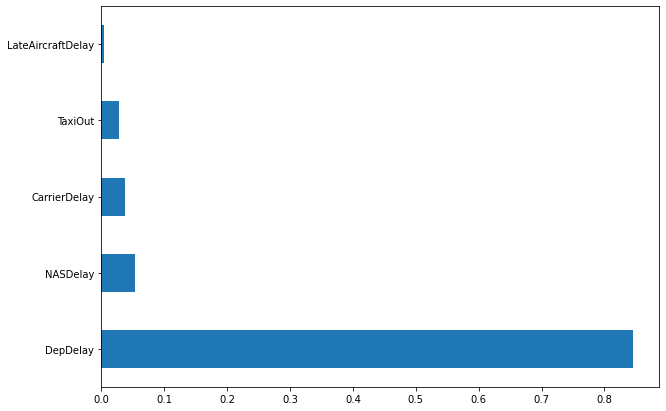

In [16]:
# plot the 5 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(5).plot(kind='barh');

Ahora, hemos observado que las variables 'LateAircraftDelay', 'CarrierDelay', 'TaxiOut', 'NASDelay' y 'DepDelay' son las que presentan mayor importancia, asi que ahora se va a generar el modelo solo utilizando estas variables.

In [17]:
# training data with 7 most important features
train_x_if = X_train[['LateAircraftDelay',
                     'CarrierDelay',
                     'TaxiOut',
                     'NASDelay',
                     'DepDelay']]
# test data with 7 most important features
test_x_if = X_test[['LateAircraftDelay',
                     'CarrierDelay',
                     'TaxiOut',
                     'NASDelay',
                     'DepDelay']]

# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, y_train)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', round(mean_squared_error(y_train, predict_train_with_if)**(0.5),2))
print('RMSE on test data: ',  round(mean_squared_error(y_test, predict_test_with_if)**(0.5),2))

RMSE on train data:  4.2
RMSE on test data:  8.68


Se observa que obtenemos unas metricas muy similares a pesar de la reduccion en la cantidad de variables utilizadas.
___
## Identificar las variables y el preprocesamiento de datos
- 'ArrDelay': Contiene la hora en que llegaron los vuelos, no fue preprocesada
- 'CRSDepTime': Hora prevista de salida. Fue estandarizada.
- 'CarrierDelay': Retrasos en control de compañia aerea. Fue estandarizada.
- 'TaxiOut':  taxi out time. Fue estandarizada.
- 'NASDelay': Retrasos en control de National Airspace System (NAS). Fue estandarizada.
- 'DepDelay': Retraso en la salida. Fue estandarizada.

A partir de ellas se va a diseñar el modelo ML pipeline.

___
## Diseño de pipeline
Ahora hacemos una lista de los pasos que van a realizarse por el pipeline
1. Realizar preprocesamiento de datos y transformacion:
> - Eliminar columnas no necesarias
> - Remover datos faltantes
> - Estandarizar los datos
2. Crear un modelo para predecir el retraso de los vuelos

In [18]:
#separate independent and target variable
X_pipe =data_sample.drop(columns=['ArrDelay'], axis=1)
y_pipe =data_sample['ArrDelay']

#split data into train and test
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_pipe, y_pipe, test_size=0.2,random_state=42)

# shape of train and test splits
X_p_train.shape, X_p_test.shape, y_p_train.shape, y_p_test.shape

((800, 27), (200, 27), (800,), (200,))

In [19]:
#function to drop unnecesary columns from the data
class DropColumnsTransformer():
    '''
    Custom transformer that drops the column/s that is 
    passed as an argument to the data to be transformed
    '''
    def __init__(self, columns=None):
        self.columns = list(columns)

    def transform(self, X, **transform_params):
        cpy_df = X.drop(self.columns, axis=1).copy()
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

Al establecer los pasos a seguir en en el modelo de pipeline, se debe poner especial atencion a que el output de un proceso sera el input del siguiente, por lo cual el orden en que se establecen es importante

In [20]:
#define model with the steps
drop_columns= ['Year','Month','DayofMonth','DayOfWeek','Cancelled','CancellationCode','Diverted','DepTime','TaxiIn','Origin','Distance','Dest','FlightNum', 'CRSArrTime', 'UniqueCarrier','ActualElapsedTime', 'CRSElapsedTime', 'AirTime','WeatherDelay','SecurityDelay','CRSDepTime']

model_pipeline = Pipeline(
    steps = [
        ('drop_columns', DropColumnsTransformer(drop_columns)),
        ('scale_data', StandardScaler()),
        ('regressor', RandomForestRegressor())
    ]
)

# fit the pipeline with the training data
model_pipeline.fit(X_p_train, y_p_train)

# predict target values on the training data
model_pipeline.predict(X_p_train)

array([ 29.16, 245.31,  34.95,  27.26,  37.02,  18.78,  27.  , 101.01,
        45.15,  22.67,  20.78, 127.04,  24.94, 166.71,  81.9 ,  17.64,
        28.31,  30.93,  59.87,  89.03, 161.43, 191.37,  70.01,  22.97,
        16.77,  40.37,  39.05, 100.48,  21.86,  21.32,  29.6 ,  20.19,
        16.29,  15.25,  47.49,  20.06, 144.53, 144.11,  80.58,  36.57,
       115.33,  67.56,  31.33, 104.57,  30.73, 215.52,  26.07,  83.18,
        34.51,  55.17,  97.12,  22.35,  23.27,  19.23, 248.59,  38.17,
        52.43,  51.07,  87.44,  86.62,  29.74,  22.94, 101.86,  73.05,
        16.14,  90.2 ,  93.4 ,  20.79,  41.49, 110.46,  52.34,  42.71,
       153.09,  25.57, 210.55,  25.56,  82.13,  78.28,  30.48,  34.57,
        24.67,  23.64,  16.18,  64.04,  38.12, 134.57,  19.86,  69.31,
        19.91,  18.01, 130.82,  22.31,  25.25,  86.24,  37.58,  55.3 ,
        72.32,  43.31,  19.62, 144.3 , 112.94,  45.73,  34.25,  37.08,
        15.89,  22.3 ,  19.88,  18.68,  93.83,  87.21,  90.93,  21.02,
      

Visualizacion del modelo pipeline:

In [41]:
set_config(display='diagram')
model_pipeline

Pipeline(steps=[('drop_columns',
                 <__main__.DropColumnsTransformer object at 0x000002070268B970>),
                ('scale_data', StandardScaler()),
                ('regressor', RandomForestRegressor())])

Para ajustar el modelo de prediccion "Random forest" se va a realizar un gridsearch. El cual ayuda en la busqueda de la mejor estrategia para el modelo. 
<br>

Primero, observamos los parametros disponibles:

In [25]:
sorted(model_pipeline.get_params().keys())

['drop_columns',
 'memory',
 'regressor',
 'regressor__bootstrap',
 'regressor__ccp_alpha',
 'regressor__criterion',
 'regressor__max_depth',
 'regressor__max_features',
 'regressor__max_leaf_nodes',
 'regressor__max_samples',
 'regressor__min_impurity_decrease',
 'regressor__min_impurity_split',
 'regressor__min_samples_leaf',
 'regressor__min_samples_split',
 'regressor__min_weight_fraction_leaf',
 'regressor__n_estimators',
 'regressor__n_jobs',
 'regressor__oob_score',
 'regressor__random_state',
 'regressor__verbose',
 'regressor__warm_start',
 'scale_data',
 'scale_data__copy',
 'scale_data__with_mean',
 'scale_data__with_std',
 'steps',
 'verbose']

Y ahora establecemos el gridsearch con los parametros que son de interes y lo aplicamos al pipeline:

In [28]:
#Grid search

# Parameters combination (Random Forest)
parameters = {"regressor__n_estimators": [1,10,20,50,75,200], "regressor__min_samples_leaf": range(1,10),'regressor__max_depth': [10,20,30,50]}

# create and instantiate grid search
grid = GridSearchCV(model_pipeline, parameters, cv=5)

#fit the model
grid.fit(X_p_train,y_p_train)


score = 0.95


Por ultimo, se realiza un cross validation del modelo y se imprimen los parametros con mejor performance.

In [32]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_) #best score found during search
print(grid.best_params_) #best combination of parameters

Best parameter (CV score=0.954):
{'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 50}


Cross validation del modelo pipeline:

*https://www.youtube.com/watch?v=f_xB7kbZR_g&ab_channel=DataSchool*

In [37]:
print(cross_val_score(grid, X_p_train, y_p_train, cv=5))

[0.96015944 0.96360876 0.89767889 0.96949704 0.96082693]


In [44]:
scores = cross_val_score(grid, X_p_train, y_p_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.03


### - Ejercicio 2:
Coge un texto en inglés que quieras, y calcula la frecuencia de las palabras.

<br>
Para el analisis del texto se ha seleccionado el discurso de aceptacion del premio Nobel de Malala

In [50]:
#save speech as a variable
speech = "'Bismillah hir rahman ir rahim. In the name of God, the most merciful, the most beneficent. Your Majesties, distinguished members of the Norweigan Nobel Committee, dear sisters and brothers, today is a day of great happiness for me. I am humbled that the Nobel Committee has selected me for this precious award. Thank you to everyone for your continued support and love. I am grateful for the letters and cards that I still receive from all around the world. Reading your kind and encouraging words strengthens and inspires me. I would like to thank my parents for their unconditional love. Thank you to my father for not clipping my wings and for letting me fly. Thank you to my mother for inspiring me to be patient and to always speak the truth- which we strongly believe is the real message of Islam. I am very proud to be the first Pashtun, the first Pakistani, and the first young person to receive this award.  I am pretty certain that I am also the first recipient of the Nobel Peace Prize who still fights with her younger brothers. I want there to be peace everywhere, but my brothers and I are still working on that. I am also honoured to receive this award together with Kailash Satyarti, who has been a champion of children's rights for a long time. Twice as long, in fact, than I have been alive. I am also glad that we can stand together and show the world that an Indian and a Pakistani can be united in peace and together  work for children's rights.Dear brothers and sisters, I was named after the inspirational Pashtun Joan of Arc, Malalai of Maiwand. The word Malala means grief stricken, sad, but in order to lend some happiness to it, my grandfather would always call me Malala - The happiest girl in this world and today I am very happy that we are standing together for an important cause. This award is not just for me. It is for those forgotten children who want education. It is for those frightened children who want peace. It is for those voiceless children who want change. I am here to stand up for their rights, raise their voice ... it is not time to pity them. It is time to take action so it becomes the last time that we see a child deprived of education. I have found that people describe me in many different ways. Some people call me the girl who was shot by the Taliban. And some, the girl who fought for her rights. Some people, call me a Nobel Laureate now. As far as I know, I am just a committed and stubborn person who wants to see every child getting quality education, who wants equal rights for women and who wants peace in every corner of the world. Education is one of the blessings of life-and one of its necessities. That has been my experience during the 17 years life. In my home in Swat Valley, in the north of Pakistan, I always loved school and learning new things. I remember when my friends and I would decorate our hands with henna for special occasions. Instead of drawing flowers and patterns we would paint our hands with mathematical formulas and equations. We had a thirst for education because our future was right there in that classroom. We would sit and read and learn together. We loved to wear neat and tidy school uniforms and we would sit there with big dreams in our eyes. We wanted to make our parents proud and prove that we could excel in our studies and achieve things, which some people think only boys can. Things did not remain the same. When I was ten, Swat, which was a place of beauty and tourism, suddenly changed into a place of terrorism. More than 400 schools were destroyed.  Girls were stopped from going to school. Women were flogged. Innocent people were killed. We all suffered. And our beautiful dreams turned into nightmares. Education went from being a right to being a crime. But when my world suddenly changed, my priorities changed too. I had two options, one was to remain silent and wait to be killed. And the second was to speak up and then be killed. I chose the second one. I decided to speak up. The terrorists tried to stop us and attacked me and my friends on 9th October 2012, but their bullets could not win. We survived. And since that day, our voices have only grown louder. I tell my story, not because it is unique, but because it is not. It is the story of many girls. Today, I tell their stories too. I have brought with me to Oslo, some of my sisters, who share this story, friends from Pakistan, Nigeria and Syria. My brave sisters Shazia and Kainat Riaz who were also shot that day in Swat with me. They went through a tragic trauma too. Also my sister Kainat Somro from Pakistan who suffered extreme violence and abuse, even her brother was killed, but she did not succumb. And there are girls with me, who I have met during my Malala Fund campaign, who are now like my sisters, my courageous 16 year old sister Mezon from Syria, who now lives in Jordan in a refugee camp and goes from tent to tent helping girls and boys to learn. And my sister Amina, from the North of Nigeria, where Boko Haram threatens and kidnaps girls, simply for wanting to go to school. Though I appear as one girl, one person, who is 5 foot 2 inches tall, if you include my high heels. I am not a lone voice, I am many. I am Shazia. I am Kainat Riaz. I am Kainat Somro. I am Mezon. I am Amina. I am those 66 million girls who are out of school. People like to ask me why education is important especially for girls. My answer is always the same. What I have learnt from the first two chapters of the Holy Quran, is the word Iqra, which means read, and the word, nun wal-qalam which means by the pen? And therefore as I said last year at the United Nations, One child, one teacher, one pen and one book can change the world. Today, in half of the world, we see rapid progress, modernisation and development. However, there are countries where millions still suffer from the very old problems of hunger, poverty, injustice and conflicts. Indeed, we are reminded in 2014 that a century has passed since the beginning of the First World War, but we still have not learnt all of the lessons that arose from the loss of those millions of lives a hundred years ago. There are still conflicts in which hundreds of thousands of innocent people have lost their lives. Many families have become refugees in Syria, Gaza and Iraq. There are still girls who have no freedom to go to school in the north of Nigeria. In Pakistan and Afghanistan we see innocent people being killed in suicide attacks and bomb blasts. Many children in Africa do not have access to school because of poverty. Many children in India and Pakistan are deprived of their right to education because of social taboos, or they have been forced into child labour and girls into child marriages. One of my very good school friends, the same age as me,  had always been a bold and confident girl and dreamed of becoming a doctor. But her dream remained a dream. At age of 12, she was forced to get married and then soon had a son at an age when she herself was a child - only 14. I know that my friend would have been a very good doctor. But she could not ... because she was a girl. Her story is why I dedicate the Nobel Prize money to the Malala Fund, to help give girls everywhere a quality education and call on leaders to help girls like me, Mezun and Amina.  The first place this funding will go is where my heart is, to build schools in Pakistan-especially in my home of Swat and Shangla. In my own village, there is still no secondary school for girls. I want to build one, so my friends can get an education-and the opportunity it brings to fulfil their dreams. That is where I will begin, but it is not where I will stop. I will continue this fight until I see every child in school. I feel much stronger after the attack that I endured, because I know, no one can stop me, or stop us, because now we are millions, standing up together. Dear brothers and sisters, great people,who brought change, like Martin Luther King and Nelson Mandela, Mother Teresa and Aung San Suu Kyi, they once stood here on this stage. I hope the steps that Kailash Satyarti and I have taken so far and will take on this journey will also bring change - lasting change. My great hope is that this will be the last time we must fight for the education of our children. We want everyone to unite to support us in our campaign so that we can solve this once and for all. Like I said, we have already taken many steps in the right direction. Now is the time to take a leap. It is not time to tell the leaders to realise how important education is - they already know it - their own children are in good schools. Now it is time to call them to take action. We ask the world leaders to unite and make education their top priority. Fifteen years ago, the world leaders decided on a set of global goals, the Millennium Development Goals.  In the years that have followed, we have seen some progress. The number of children out of school has been halved.  However, the world focused only on expanding primary education, and progress did not reach everyone. Next year, in 2015, representatives from around the world will meet at the United Nations to decide on the next set of goals, the Sustainable Development Goals. This will set the world's ambition for generations to come. Leaders must seize this opportunity to guarantee a free, quality primary and secondary education for every child. Some will say this is impractical, or too expensive, or too hard.  Or even impossible.  But it is time the world thinks bigger. Dear brothers and sisters, the so-called world of adults may understand it, but we children don't. Why is it that countries which we call strong are so powerful in creating wars but so weak in bringing peace? Why is it that giving guns is so easy but giving books is so hard? Why is it that making tanks is so easy, but building schools is so difficult? As we are living in the modern age, the 21st century and we all believe that nothing is impossible. We can reach the moon and maybe soon will land on Mars. Then, in this, the 21st century, we must be determined that our dream of quality education for all will also come true. So let us bring equality, justice and peace for all. Not just the politicians and the world leaders, we all need to contribute.  Me. You. It is our duty. So we must work ... and not wait. I call upon my fellow children to stand up around the world. Dear sisters and brothers, let us become the first generation to decide to be the last. The empty classrooms, the lost childhoods, wasted potential-let these things end with us. Let this be the last time that a boy or a girl spends their childhood in a factory. Let this be the last time that a girl gets forced into early child marriage. Let this be the last time that an innocent child loses their life in war. Let this be the last time that a classroom remains empty. Let this be the last time that a girl is told education is a crime and not a right. Let this be the last time that a child remains out of school. Let us begin this ending. Let this end with us. And let us build a better future right here, right now. Thank you.'"

Primer paso **Word Tokenization**: dividide el texto por palabras

In [54]:
tokenized_word=word_tokenize(speech)
print(tokenized_word)

["'Bismillah", 'hir', 'rahman', 'ir', 'rahim', '.', 'In', 'the', 'name', 'of', 'God', ',', 'the', 'most', 'merciful', ',', 'the', 'most', 'beneficent', '.', 'Your', 'Majesties', ',', 'distinguished', 'members', 'of', 'the', 'Norweigan', 'Nobel', 'Committee', ',', 'dear', 'sisters', 'and', 'brothers', ',', 'today', 'is', 'a', 'day', 'of', 'great', 'happiness', 'for', 'me', '.', 'I', 'am', 'humbled', 'that', 'the', 'Nobel', 'Committee', 'has', 'selected', 'me', 'for', 'this', 'precious', 'award', '.', 'Thank', 'you', 'to', 'everyone', 'for', 'your', 'continued', 'support', 'and', 'love', '.', 'I', 'am', 'grateful', 'for', 'the', 'letters', 'and', 'cards', 'that', 'I', 'still', 'receive', 'from', 'all', 'around', 'the', 'world', '.', 'Reading', 'your', 'kind', 'and', 'encouraging', 'words', 'strengthens', 'and', 'inspires', 'me', '.', 'I', 'would', 'like', 'to', 'thank', 'my', 'parents', 'for', 'their', 'unconditional', 'love', '.', 'Thank', 'you', 'to', 'my', 'father', 'for', 'not', 'cli

Segundo paso: Eliminar los simbolos de puntuacion innecesarios ('.',',',etc)

In [60]:
# Removing the unnecessary puntuation
tokenized_word = list(filter(lambda x: x not in string.punctuation, tokenized_word)) # Remove (','; '.')
tokenized_word[:10]

["'Bismillah",
 'hir',
 'rahman',
 'ir',
 'rahim',
 'In',
 'the',
 'name',
 'of',
 'God']

Ahora calculamos la frecuencia y distribucion de las palabras en el texto:

In [62]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 677 samples and 2079 outcomes>


Observamos las palabras mas comunes en el texto:

In [63]:
fdist.most_common(5)

[('the', 83), ('and', 69), ('to', 57), ('I', 54), ('of', 46)]

Visualizacion de la frecuencia de las palabras en el texto

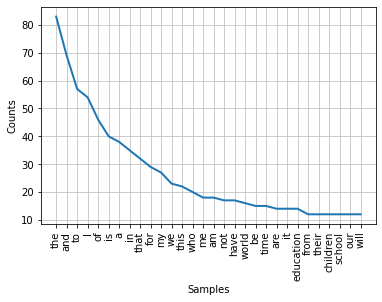

In [64]:
fdist.plot(30,cumulative=False)
plt.show()

## Nivel 2
### - Ejercicio 1:
Quita las stopwords y realiza stemming en tu conjunto de datos.
<br>

>Las stopwords son palabras consideradas como ruido en el texto, como pueden ser 'is', 'am', 'this', etc. Por lo que ahora se procedera a eliminarlas.

Primero importamos las stopwords

In [66]:
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...


{"that'll", 'our', 'off', 'there', 'as', "hasn't", 'on', 'nor', "wasn't", 'isn', 'me', "mightn't", 'do', 'of', 'about', 'to', 'up', 'does', 'then', 'if', 'not', 'itself', 'am', 'are', 'o', 'so', 'themselves', 'that', 'an', "weren't", 'until', 'been', 'had', 'haven', 'over', 'won', 'yourselves', 'what', 'out', 'hadn', "you're", 'further', 'with', 'his', 'no', 've', 'shouldn', 'is', 'some', 'but', 'too', "should've", 'against', 'who', 'didn', 'into', 'my', 'ours', 'mustn', "shan't", 'under', 'shan', 'd', 'here', 'few', "isn't", 'whom', 'did', 'once', 'very', 'between', 'hers', 'why', 'll', 'ma', 'through', 'a', 'don', "shouldn't", 'doing', 'only', 'will', 'aren', 'from', "it's", 'was', 'you', 'or', 'below', 'her', 'hasn', 'than', 'should', 'have', 'wouldn', 'those', 'himself', 'other', 'their', 'during', 'can', 'at', 'having', 'these', "mustn't", "don't", 'most', "doesn't", "needn't", 'yourself', 'again', 'where', 'by', "couldn't", 'being', 'couldn', 'has', 'same', 'mightn', 'herself', '

[nltk_data]   Unzipping corpora\stopwords.zip.


Segundo se eliminan las stopwords del conjunto de palabras:

In [68]:
#removing stopwords
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)

print("Filterd Words:",filtered_word)

Filterd Words: ["'Bismillah", 'hir', 'rahman', 'ir', 'rahim', 'In', 'name', 'God', 'merciful', 'beneficent', 'Your', 'Majesties', 'distinguished', 'members', 'Norweigan', 'Nobel', 'Committee', 'dear', 'sisters', 'brothers', 'today', 'day', 'great', 'happiness', 'I', 'humbled', 'Nobel', 'Committee', 'selected', 'precious', 'award', 'Thank', 'everyone', 'continued', 'support', 'love', 'I', 'grateful', 'letters', 'cards', 'I', 'still', 'receive', 'around', 'world', 'Reading', 'kind', 'encouraging', 'words', 'strengthens', 'inspires', 'I', 'would', 'like', 'thank', 'parents', 'unconditional', 'love', 'Thank', 'father', 'clipping', 'wings', 'letting', 'fly', 'Thank', 'mother', 'inspiring', 'patient', 'always', 'speak', 'truth-', 'strongly', 'believe', 'real', 'message', 'Islam', 'I', 'proud', 'first', 'Pashtun', 'first', 'Pakistani', 'first', 'young', 'person', 'receive', 'award', 'I', 'pretty', 'certain', 'I', 'also', 'first', 'recipient', 'Nobel', 'Peace', 'Prize', 'still', 'fights', 'you

Ahora podemos ver las palarbas mas comunes en el discurso, sin contar las stopwords:

In [70]:
fdist_filter = FreqDist(filtered_word)
fdist_filter.most_common(5)

[('I', 54), ('world', 16), ('time', 15), ('education', 14), ('children', 12)]

**Stemming**  es un proceso de normalizacion linguistica, el cual reduce las palabras a su palabra raiz.

In [78]:
#Stemming
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Words:",filtered_word[:30])
print("Stemmed Words:",stemmed_words[:30])

Filtered Words: ["'Bismillah", 'hir', 'rahman', 'ir', 'rahim', 'In', 'name', 'God', 'merciful', 'beneficent', 'Your', 'Majesties', 'distinguished', 'members', 'Norweigan', 'Nobel', 'Committee', 'dear', 'sisters', 'brothers', 'today', 'day', 'great', 'happiness', 'I', 'humbled', 'Nobel', 'Committee', 'selected', 'precious']
Stemmed Words: ["'bismillah", 'hir', 'rahman', 'ir', 'rahim', 'in', 'name', 'god', 'merci', 'benefic', 'your', 'majesti', 'distinguish', 'member', 'norweigan', 'nobel', 'committe', 'dear', 'sister', 'brother', 'today', 'day', 'great', 'happi', 'i', 'humbl', 'nobel', 'committe', 'select', 'preciou']


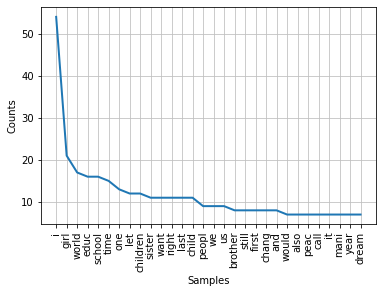

In [76]:
# Frequency of the words with Stemming
fdist_stem = FreqDist(stemmed_words)
fdist_stem.plot(30,cumulative=False)
plt.show()

In [77]:
fdist_stem.most_common(5)

[('i', 54), ('girl', 21), ('world', 17), ('educ', 16), ('school', 16)]

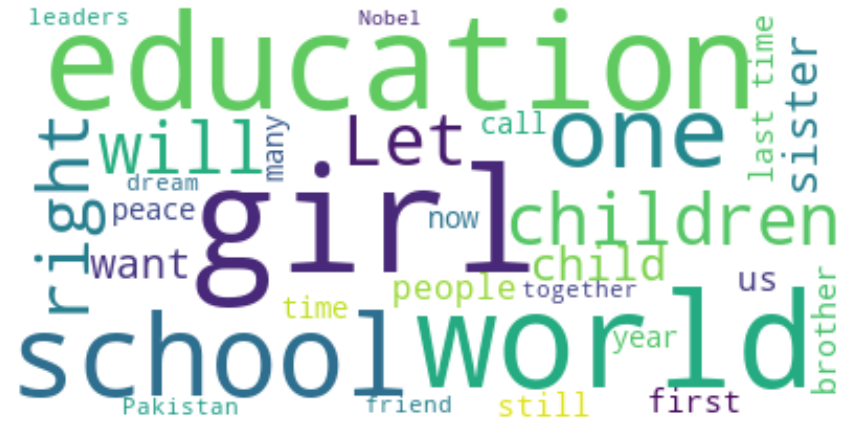

In [85]:
wordcloud = WordCloud(max_font_size=70,max_words=30, background_color="white").generate(speech)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off'); 
plt.show()

## Nivel 3
### - Ejercicio 1
Realiza sentimiento analysis en tu conjunto de datos.

>Sentiment analysis: cuantifica el contenido, la idea, la creencia y la opinion de un texto. 

Ahora aplicamos el Sentiment analysis al discurso, primero creamos un dataframe con las oraciones tokenizadas del discurso

In [92]:
tokenized_text=sent_tokenize(speech)
print(tokenized_text)

["'Bismillah hir rahman ir rahim.", 'In the name of God, the most merciful, the most beneficent.', 'Your Majesties, distinguished members of the Norweigan Nobel Committee, dear sisters and brothers, today is a day of great happiness for me.', 'I am humbled that the Nobel Committee has selected me for this precious award.', 'Thank you to everyone for your continued support and love.', 'I am grateful for the letters and cards that I still receive from all around the world.', 'Reading your kind and encouraging words strengthens and inspires me.', 'I would like to thank my parents for their unconditional love.', 'Thank you to my father for not clipping my wings and for letting me fly.', 'Thank you to my mother for inspiring me to be patient and to always speak the truth- which we strongly believe is the real message of Islam.', 'I am very proud to be the first Pashtun, the first Pakistani, and the first young person to receive this award.', 'I am pretty certain that I am also the first rec

In [98]:
df_speech = pd.DataFrame({'Sentences': tokenized_text})

,Sentences
0,'Bismillah hir rahman ir rahim.
1,"In the name of God, the most merciful, the mos..."
2,"Your Majesties, distinguished members of the N..."
3,I am humbled that the Nobel Committee has sele...
4,Thank you to everyone for your continued suppo...
...,...
136,Let this be the last time that a child remains...
137,Let us begin this ending.
138,Let this end with us.
139,"And let us build a better future right here, r..."


Ahora iniciamos el modelo y analizamos el sentimiento de cada frase, agregando el resultado al dataframe

In [107]:
s_analyzer=SentimentIntensityAnalyzer()

sentiments=df_speech['Sentences'].apply(lambda x: s_analyzer.polarity_scores(x))

df_speech['compound']=sentiments.apply(lambda x : x['compound'])
df_speech['negative']=sentiments.apply(lambda x : x['neg'])
df_speech['neutral']=sentiments.apply(lambda x : x['neu'])
df_speech['positive']=sentiments.apply(lambda x : x['pos'])

In [108]:
df_speech

,Sentences,negative,neutral,positive,compound
0,'Bismillah hir rahman ir rahim.,0.0,1.000,0.000,0.0000
1,"In the name of God, the most merciful, the mos...",0.0,0.613,0.387,0.6901
2,"Your Majesties, distinguished members of the N...",0.0,0.636,0.364,0.8834
3,I am humbled that the Nobel Committee has sele...,0.0,0.583,0.417,0.8349
4,Thank you to everyone for your continued suppo...,0.0,0.427,0.573,0.8555
...,...,...,...,...,...
136,Let this be the last time that a child remains...,0.0,1.000,0.000,0.0000
137,Let us begin this ending.,0.0,1.000,0.000,0.0000
138,Let this end with us.,0.0,1.000,0.000,0.0000
139,"And let us build a better future right here, r...",0.0,0.756,0.244,0.4404


In [104]:
s_analyzer.polarity_scores(speech)

{'neg': 0.111, 'neu': 0.709, 'pos': 0.18, 'compound': 0.9994}

Al analizar la polaridad del texto, se puede observar que el discurso de Malala es mayormente neutral

In [113]:
df_speech[["negative","positive",'neutral']].describe()

,negative,positive,neutral
count,141.000000,141.000000,141.000000
mean,0.071986,0.139943,0.788064
std,0.138278,0.178446,0.201426
min,0.000000,0.000000,0.225000
25%,0.000000,0.000000,0.641000
50%,0.000000,0.078000,0.815000
75%,0.104000,0.244000,1.000000
max,0.615000,0.767000,1.000000


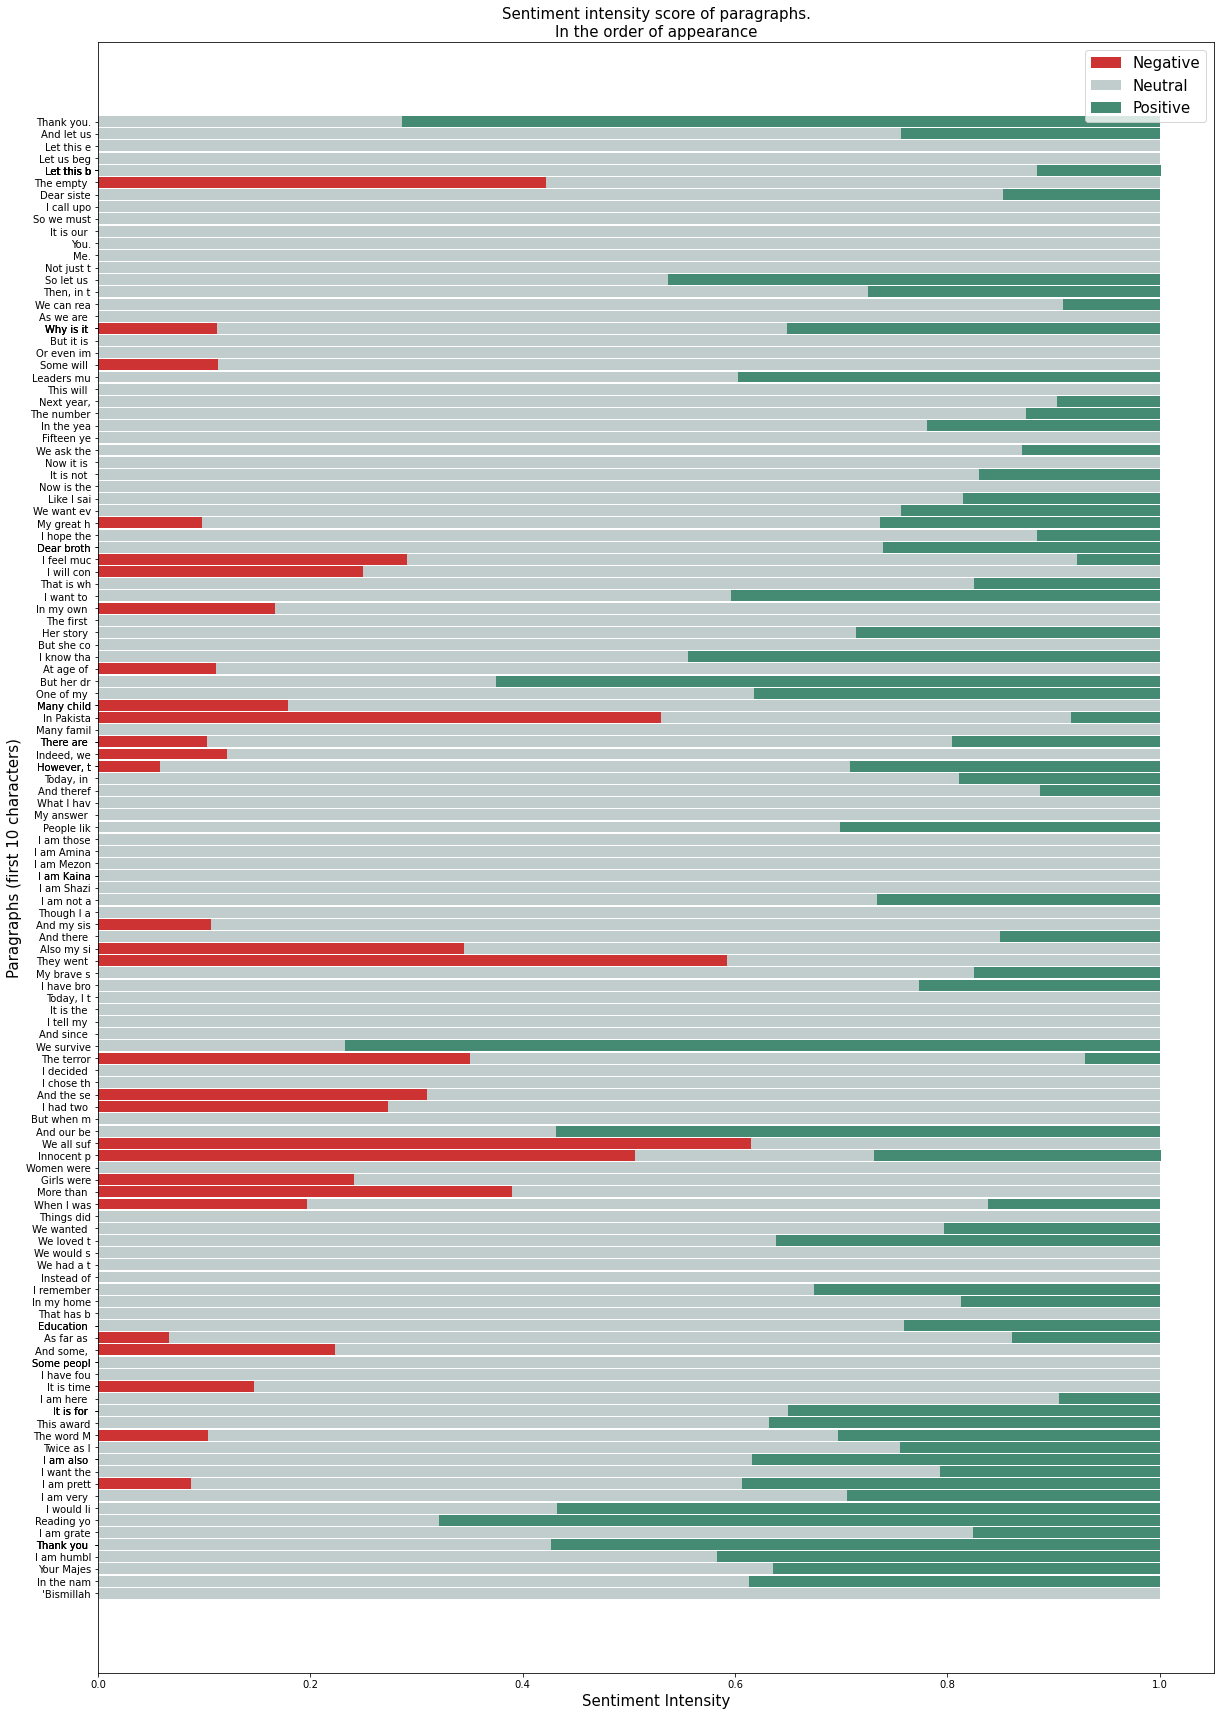

In [111]:
plt.figure(figsize=(20,30))
names = df_speech['Sentences'].str[:10]
barWidth = 0.9

# Create negative Bars
plt.barh(y=names, 
        width=df_speech.negative, 
        height=barWidth, color='#CD3333', label='Negative')
# Create neutral Bars
plt.barh(y=names, 
        width=df_speech.neutral,
        height=barWidth,  left=df_speech.negative,  color='#C1CDCD', label='Neutral')
# Create positive Bars
plt.barh(y=names, 
        width=df_speech.positive, 
        height=barWidth,  left=[i+j for i,j in zip(df_speech.negative, df_speech.neutral)],color='#458B74', label='Positive')
 
plt.yticks(names)
plt.ylabel("Paragraphs (first 10 characters)", fontsize=15)
plt.xlabel("Sentiment Intensity", fontsize=15)
plt.legend(fontsize=15) 
plt.title("Sentiment intensity score of paragraphs.\nIn the order of appearance", fontsize=15)
plt.show()

Se puede observar que el tono del discurso es neutral y mayormente positivo.